# CHAPTER 07. 군집화

## 01. K-평균 알고리즘 이해

K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘이다. K-평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.

군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다. 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법이다.
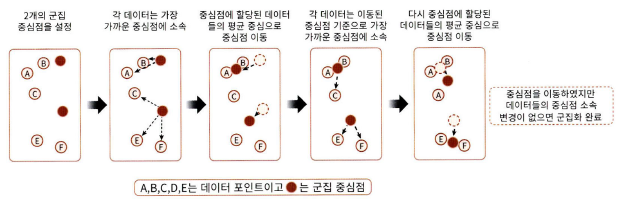

1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓는다. 전체 데이터를 2개로 군집화하려면 2개의 중심을 임의의 위치에 가져다 놓아야 한다(임의의 위치에 군집 중심점을 가져다 높으면 반복적인 이동 수행을 너무 많이 해서 수행 시간이 오래 걸리기 때문에 초기화 알고리즘으로 적합한 위치에 중심점을 가져다 놓지만, 여기서는 설명을 위해 임의의 위치로 가정한다).
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속된다. 위 그림에서는 A, B 데이터가 같은 중심점에 소속되며, C, E, F 데이터가 같은 중심점에 소속된다.
3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동한다. 위 그림에서는 A, B 데이터 포인트 평균 위치로 중심점이 이동했고, 다른 중심점 역시 C, E, F 데이터 포인트의 평균 위치로 이동했다.
4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경한다. 위 그림에서는 C 데이터가 기존의 중심점보다 더 가까운 중심점으로 변경됐다.
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동한다. 위 그림에서는 데이터 C가 중심 소속이 변경되면서 두 개의 중심이 모두 이동한다.
6. 중심점을 이동했는데, 데이터의 중심점 소속 변경이 없으면 군집화를 종료한다. 그렇지 않다면 다시 4번 과정을 거쳐서 소속을 변경하고 이 과정을 반복한다.

**K-평균의 장점**
* 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
* 알고리즘이 쉽고 간결하다.

**K-평균의 단점**
* 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다(이를 위해 PCA로 차원 감소를 적용해야 할 수도 있다).
* 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느리다.
* 몇 개의 군집(cluster)을 선택해야 할 지 가이드하기 어렵다.


**사이킷런 KMeans 클래스 소개**

사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공한다. KMeans 클래스는 다음과 같은 초기화 파라미터를 가지고 있다.
```
class sklearn.cluster.KMeans(n_cluster=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
```

이 중 중요한 파라미터는 다음과 같다.
* KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미한다.
* init은 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-menas++ 방식으로 최초로 설정한다.
* max_iter은 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.

KMeans는 사이킷런 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트) 메서드를 이용해 수행하면 된다. 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수 있다. 주요 속성 정보는 다음과 같다.
* labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
* cluster_centers_ : 각 군집 중심점 좌표(Shape은 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있다.

**K-평균을 이용한 붓꽃 데이터 세트 군집화**

붓꽃 데이터를 이용해 K-평균 군집화를 수행해 보자. 붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이와 너비에 따른 품종을 분류하는 데이터 세트이다. 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해 보고, 이를 분류 값과 비교해 보겠다.

사이킷런의 load_iris()를 이용해 붓꽃 데이터를 추출하되 더 편리한 데이터 핸들링을 위해서 DataFrame으로 변경한다.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트를 3개 그룹으로 군집화해 보겠다. 이를 위해 n_cluster은 3, 초기 중심 설정 방식은 디폴트 값인 k-means++, 최대 반복 횟수 역시 디폴트 값인 max_iter=300으로 설정한 KMeans 객체를 만들고, 여기에 fit()을 수행한다.

In [ ]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0, n_init=10)
kmeans.fit(irisDF)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

fit()을 수행해 irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환됐다. kmeans의 labels_ 속성값을 확인해보면 irisDF의 각 데이터가 어떤 중심에 속하는지를 알 수 있다. labels_ 속성값을 출력해 보자.

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


labels_의 값이 0, 1, 2로 돼있으면, 이는 각 레코드가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함을 의미한다.

실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인해보자. 붓꽃 데이터 세트의 target 값을 'target' 칼럼으로, 앞에서 구한 labels_ 값을 'cluster' 칼럼으로 지정해 irisDF DataFrame에 추가한 뒤에 group by 연산을 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해 target과 cluster 값 개수를 비교할 수 있다.

In [ ]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

분류 타깃이 0인 데이터는 1번 군집으로 모두 잘 그루핑됐다. 타깃이 1인 데이터는 2개만 2번 군집으로 그루핑됐고, 나머지 48개는 모두 0번 군집으로 그루핑됐다. 하지만 Target 2값 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산돼 그루핑됐다.

이번에는 붓꽃 데이터 세트의 군집화를 시각화해 보겠다. 2차원 평면상에서 개별 데이터의 군집화를 시각적으로 표현하려고 한다. 붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X 좌표, Y 좌표로 개별 데이터를 표현하도록 하겠다.

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:, 0]
irisDF['pca_y']=pca_transformed[:, 1]
irisDF.head(3)

pca_x는 X 좌표 값, pca_y는 Y 좌표 값을 나타낸다. 각 군집별로 cluster 0은 마커 'o', cluster 1은 마커 's', cluster 2는 마커 '^'로 표현한다. 맷플롯립의 산점도는 서로 다른 마커를 한 번에 표현할 수 없으므로 마커별로 별도의 산점도를 수행한다.

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 0, 5, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

Cluster 1을 나타내는 네모(square, 'S')는 명확히 다른 군집과 잘 분리돼있다. Cluster 0을 나타내는 동그라미('o')와 Cluster 2를 나타내는 세모('^')는 상당 수준 분리돼있지만, 네모만큼 명확하게는 분리되지 않음을 알 수 있다. Cluster 0과 1의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재한다.

**군집화 알고리즘 테스트를 위한 데이터 생성**

사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해보기 위한 간단한 데이터 생성기를 제공한다. 대표적인 군집화용 데이터 생성기로는 make_blobs()와 make_classification() API가 있다. 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다. 둘 중 어떤 것을 사용하든 큰 차이는 없지만, make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가돼있으며 make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있다. 둘 다 분류 용도로도 테스트 데이터 생성이 가능하다. 이 외에 make_circle(), make_moon() API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용된다.

make_blobs()의 간략한 사용법을 알아보면서 군집화를 위한 테스트 데이터 세트를 만드는 방법을 살펴보겠다. make_blobs()를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환된다. make_blobs()의 호출 파라미터는 다음과 같다.
* n_samples : 생성할 총 데이터 개수. 디폴트 100
* n_features : 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표 상에 표현한다.
* centers : int 값. 예를 들어 3으로 설정하면 군집의 개수를 나타낸다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미한다.
* cluster_std : 생성될 군집 데이터의 표준편차를 의미한다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만든다. 군집별로 서로 다른 표준편차를 가진 데이터 세트를 만들 때 사용한다.

X, y=make_blobs(n_samples=200, n_features=2, centers=3, random_state=0)을 호출하면 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환된다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts=np.unique(y, return_counts=True)
print(unique, counts)

피처 데이터 세트 X는 200개의 레코드와 2개의 피처를 가지므로 shape은 (200, 2), 군집 타깃 데이터 세트인 y의 shape은 (200,), 그리고 3개의 cluster의 값은 [0, 1, 2]이며 각각 67, 67, 66개로 균일하게 구성돼있다. 좀 더 데이터 가공을 편리하게 하기 위해서 위 데이터 세트를 DataFrmae으로 변경한다. 피처의 이름은 ftr1, ftr2이다.

In [ ]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
clusterDF.head(3)

이제 make_blob()으로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인해보겠다. 타깃값 0, 1, 2에 따라 마커를 다르게 해서 산점도를 그려보면 다음과 같이 3개의 구분될 수 있는 군집 영역(make_blobs()이 y 반환 값)으로 피처 데이터 세트가 만들어졌음을 알 수 있다.

In [ ]:
target_list=np.unique(y)
# 각 타깃별 산점도의 마커 값
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2로 scatter plot을 marker 별로 생성
for target in target_list:
    target_cluster=clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

이번에는 이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤 군집별로 시각화해 보자. 먼저 KMeans 객체에 fit_predict(X)를 수행해 make_blobs()의 피처 데이터 세트인 X 데이터를 군집화한다. 이를 앞에서 구한 clusterDF DataFrame의 'kmeans_label' 칼럼으로 저장한다. 그리고 KMeans 객체의 cluster_centers_ 속성은 개별 군집의 중심 위치 좌표를 나타내기 위해 사용한다.

In [ ]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0, n_init=10)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster=clusterDF[clusterDF['kmeans_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있다(그래서 산점도의 마커가 서로 다를 수 있다).

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

Target 0이 cluster label 0으로, target 1이 label 2로, target 2가 label 1로 거의 대부분 잘 매핑됐다. make_blobs()는 cluster_std 파라미터로 데이터 분포도를 조절한다. 다음 그림은 cluster_std가 0.4, 0.8, 1.2, 1.6일 때의 데이터를 시각화한 것이다. cluster_std가 작을수록 군집 중심에 데이터가 모여있으며, 클수록 데이터가 퍼져있음을 알 수 있다.
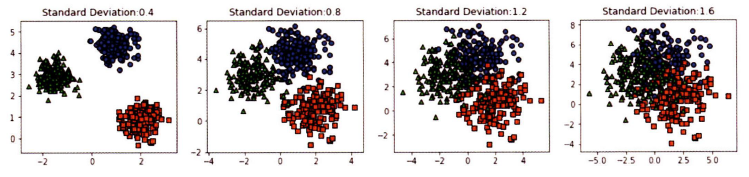

## 02. 군집 평가(Cluster Evaluation)

앞의 붓꽃 데이터 세트의 경우 결괏값에 품종을 뜻하는 타깃 레이블이 있었고, 군집화 결과를 이 레이블과 비교해 군집화가 얼마나 효율적으로 됐는지 짐작할 수 있었다. 하지만 대부분의 군집화 데이터 세트는 이렇게 비교할만한 타깃 레이블을 가지고 있지 않다. 또한 군집화는 분류(Classification)와 유사해보일 수 있으나 성격이 많이 다르다. 데이터 내에 숨어있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다.

그렇다면 군집화가 효율적으로 잘 됐는지 평가할 수 있는 지표에는 어떤 것이 있을까? 비지도학습의 특성 상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵다. 그럼에도 불구하고 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 이용한다. 

**실루엣 분석의 개요**

군집화 평가 방법으로 실루엣 분석(silhouette analysis)이 있다. 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼있는지 나타낸다. 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있다는 의미이다. 군집화가 잘될수록 개별 군집은 비슷한 정도의 여유 공간을 가지고 떨어져 있을 것이다.

실루엣 분석은 실루엣 계수(silhouette coefficient)를 기반으로 한다. 실루엣 계수는 개별 데이터가 가지는 군집화 지표이다. 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼있는지를 나타내는 지표이다.
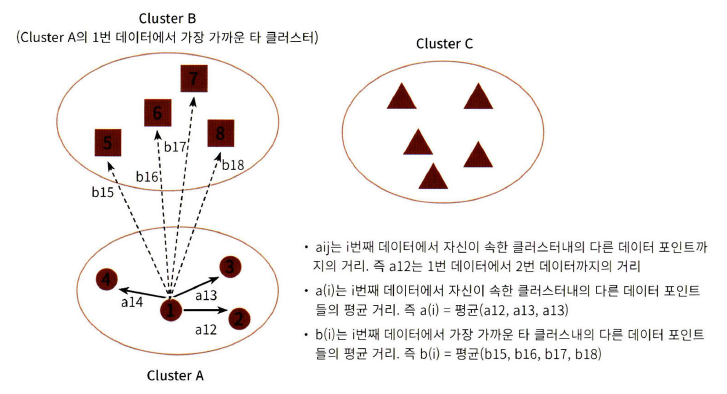

특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i), 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산된다. 두 군집 간의 거리가 얼마나 떨어져있는가의 값은 b(i)-a(i)이며 이 값을 정규화하기 위해 MAX(a(i), b(i)) 값으로 나눈다. 따라서 i번째 데이터 포인트의 실루엣 계수 값 s(i)는 다음과 같이 정의한다.
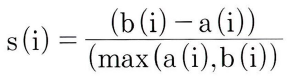

실루엣 계수는 -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것이다. - 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻한다.

사이킷런은 이러한 실루엣 분석을 위해 다음과 같은 메서드를 제공한다.
* sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환한다.
* sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환한다. 즉, np.mean(silhoue_samples())이다. 일반적으로 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단할 수 있다. 하지만 무조건 이 값이 높다고 군집화가 잘 됐다고 판단할 수는 없다.

좋은 군집화가 되려면 다음 기준 조건을 만족해야 한다.
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0~1 값을 가지며, 1에 가까울수록 좋다.
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아니다.

**붓꽃 데이터 세트를 이용한 군집 평가**

앞의 붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가해 보자. 이를 위해 sklearn.metrics 모듈의 silhouette_samples()와 silhouette_score()를 이용한다.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0, n_init=10).fit(irisDF)
irisDF['cluster']=kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples=silhouette_samples(iris.data, irisDF['cluster'])
print('silhuette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score=silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score : {0:.3f}'.format(average_score))
irisDF.head(3)

평균 실루엣 계수 값이 약 0.553이다. 1번 군집의 경우, 0.8 이상의 높은 실루엣 계수 값을 나타내고 있다. 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문일 것이다. 군집별 평균 실루엣 계수 값을 알아보겠다. irisDF DataFrame에서 군집 칼럼별로 group by하여 silhouette_coeff 칼럼의 평균값을 구하면 된다.

In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

1번 군집은 실루엣 계수 평균 값이 약 0.79인데 반해, 0번은 약 0.41, 2번은 0.45로 상대적으로 평균값이 1번에 비해 낮다.

**군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없다. 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다. 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐있는 경우, K-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있다.

첫 번째 경우 다음 그림과 같이 주어진 데이터에 대해 군집의 개수 2개를 정했을 때이다. 이때 평균 실루엣 계수, 즉 silhouette_score은 약 0.704로 매우 높게 나타났다. 하지만 이렇게 2개로 군집화하는 것이 최적의 방법일까? 다음 그림에서 왼쪽 부분은 개별 군집에 속하는 데이터의 실루엣 계수를 2차원으로 나타낸 것이다. X축은 실루엣 계수 값이고, Y축은 개별 군집과 이에 속하는 데이터이다. 개별 군집은 Y축에 숫자 값으로 0, 1로 표시돼있다. 이에 해당하는 데이터는 일일이 숫자 값으로 표시되지 않았지만, Y축 높이로 추측할 수 있다. 그리고 점선으로 표시된 선은 전체 평균 실루엣 계수 값을 나타낸다. 이로 판단해볼 때 1번 군집의 모든 데이터는 평균 실루엣 계수 값 이상이지만, 2번 군집의 경우는 평균보다 적은 데이터 값이 매우 많다.

오른쪽에 있는 그림으로 그 이유를 보충해서 설명할 수 있다. 1번 군집의 경우는 0번 군집과 멀리 떨어져있고, 내부 데이터끼리도 잘 뭉쳐져있다. 하지만 0번 군집의 경우는 내부 데이터끼리 많이 떨어져있다.
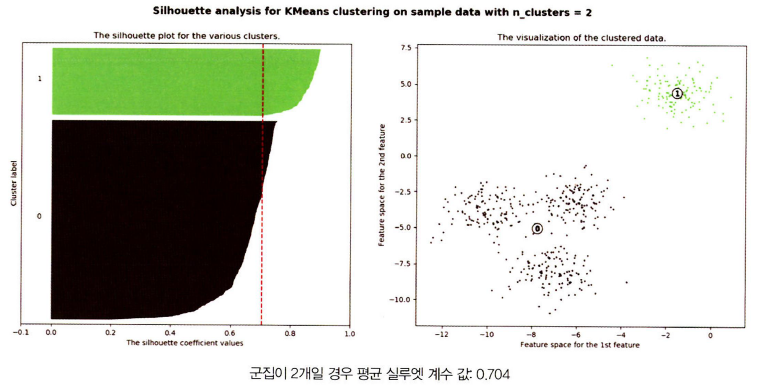

다음 그림은 군집 개수가 3개일 경우이다. 전체 데이터의 평균 실루엣 계수 값은 약 0.588이다. 1번, 2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만, 0번의 경우 모두 평균보다 낮다. 오른쪽 그림을 보면 0번의 경우 내부 데이터 간의 거리도 멀지만, 2번 군집과도 가깝게 위치하고 있기 때문이다.
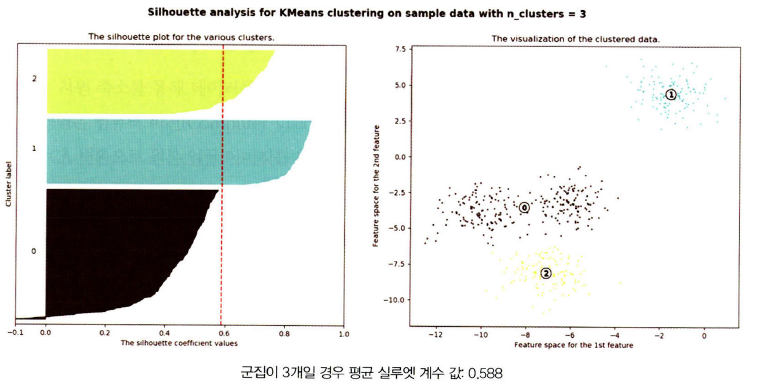

다음으로 군집이 4개인 경우를 보자. 이때의 평균 실루엣 계수 값은 약 0.65이다. 왼쪽 그림에서 보듯이 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치하고 있다. 1번 군집의 경우 모든 데이터가 평균보다 높은 계수 값을 가지고 있으며, 0번, 2번의 경우는 절반 이상이 평균보다 높은 계수 값을, 3번 군집의 경우만 약 1/3 정도가 평균보다 높은 계수 값을 가지고 있다. 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 4개인 경우가 가장 이상적인 군집화 개수로 판단할 수 있다.
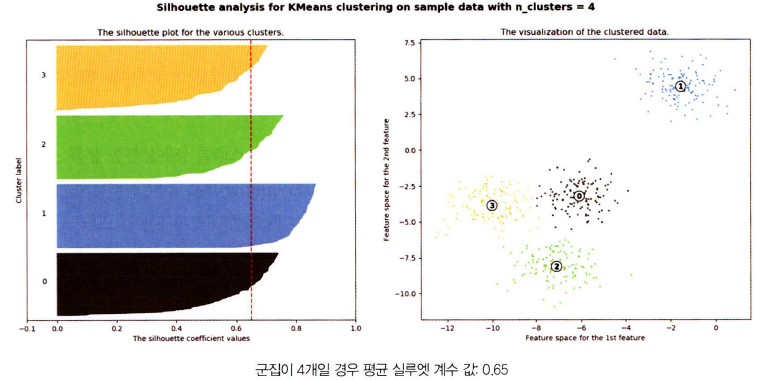

visualize_silhouette() 함수는 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때 개별 군집별 평균 실루엣 계수 값을 시각화해서 군집의 개수를 정하는데 도움을 준다.
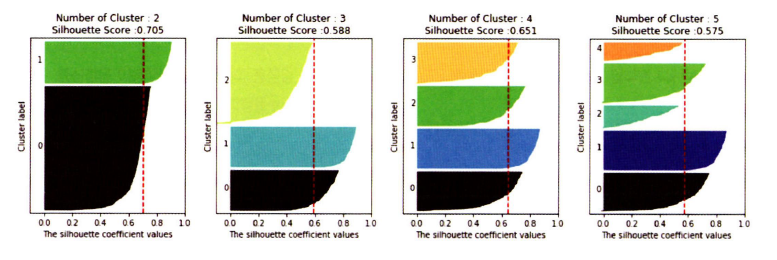
4개의 군집일 때 가장 최적이 된다.

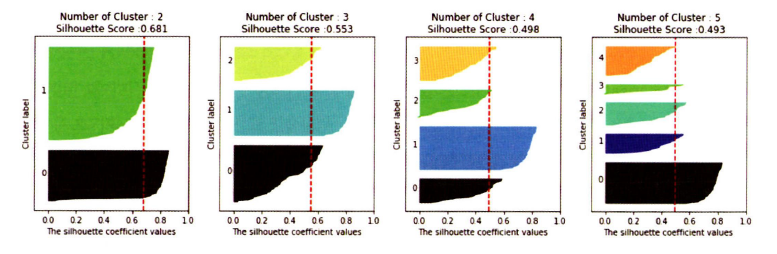
군집 개수를 2개로 하는 것이 가장 좋아보인다.

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다. 특히 몇 만 건 이상의 데이터에 대해 사이킷런의 실루엣 계수 평가 API를 개인용 PC에서 수행할 경우 메모리 부족 등의 에러가 발생하기 쉽다. 이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야 한다.